In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [22]:
pre_mf = True
pre_ec = True
post_mf = True
post_ec = True

if pre_mf:
    with open('1000_1pretrain_mf.csv', 'r') as csvFile:
        pre_train_mf = np.asarray([[int(x) for x in rec] for rec in csv.reader(csvFile, delimiter=',')])
    csvFile.close()
    pretrainmf_avg = np.average(pre_train_mf, axis=0)
    pretrainmf_rm  = running_mean(pretrainmf_avg, 30)
    pretrainmf_max = np.max(pre_train_mf, axis = 0)
    pretrainmf_med = np.median(pre_train_mf, axis = 0)
    pretrainmf_sem = sp.sem(pre_train_mf, axis = 0)

if pre_ec: 
    with open('10pretrain_ec.csv', 'r') as csvFile:
        pre_train_ec = np.asarray([[int(x) for x in rec] for rec in csv.reader(csvFile, delimiter=',')])
    csvFile.close()
    pretrainec_avg = np.average(pre_train_ec, axis=0)
    pretrainec_max = np.max(pre_train_ec, axis = 0)
    pretrainec_med = np.median(pre_train_ec, axis = 0)
    pretrainec_sem = sp.sem(pre_train_ec, axis = 0)

if post_mf:
    with open('1000_1posttrain_mf.csv', 'r') as csvFile:
        post_train_mf = np.asarray([[int(x) for x in rec] for rec in csv.reader(csvFile, delimiter=',')])
    csvFile.close()
    posttrainmf_avg = np.average(post_train_mf, axis=0)
    posttrainmf_rm = running_mean(posttrainmf_avg, 30)
    #posttrainmf_max = np.max(post_train_mf, axis = 0)
    #posttrainmf_med = np.median(post_train_mf, axis = 0)
    #posttrainmf_sem = sp.sem(post_train_mf, axis = 0)
    
if post_ec:
    with open('10posttrain_ec.csv', 'r') as csvFile:
        post_train_ec = np.asarray([[int(x) for x in rec] for rec in csv.reader(csvFile, delimiter=',')])
    csvFile.close()
    posttrainec_avg = np.average(post_train_ec, axis=0)
    posttrainec_max = np.max(post_train_ec, axis = 0)
    posttrainec_med = np.median(post_train_ec, axis = 0)
    posttrainec_sem = sp.sem(post_train_ec, axis = 0)



In [23]:
print(posttrainmf_avg.shape)

(1000,)


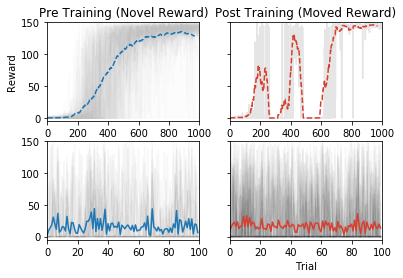

In [41]:
fig, ax = plt.subplots(2,2, sharex = False, sharey = True)
if pre_mf:
    for i in range(pre_train_mf.shape[0]):
        ax[0,0].plot(pre_train_mf[i], 'k', alpha = 0.01)
    ax[0,0].plot(pretrainmf_rm, "--", color=np.array([31,119,180])/255, label ='MF only')
    
if pre_ec:
    for i in range(pre_train_ec.shape[0]):
        ax[1,0].plot(pre_train_ec[i], 'k', alpha = 0.03)
    ax[1,0].plot(pretrainec_avg, color=np.array([31,119,180])/255, label ='MF + EC')
    
if post_mf:
    for i in range(post_train_mf.shape[0]):
        ax[0,1].plot(post_train_mf[i], 'k', alpha = 0.1)
    ax[0,1].plot(posttrainmf_rm, "--",color=np.array([215,63,49])/255, label ='MF only')

if post_ec:
    for i in range(post_train_ec.shape[0]):
        ax[1,1].plot(post_train_ec[i], 'k', alpha = 0.03)
    ax[1,1].plot(posttrainec_avg, color=np.array([215,63,49])/255, label ='MF + EC')


ax[0,0].set_xlim((0,1000))
ax[0,1].set_xlim((0,1000))
ax[1,0].set_xlim((0,100))
ax[1,1].set_xlim((0,100))

ax[0,0].set_ylim((-5,150))

ax[0,0].set_ylabel('Reward')
ax[1,1].set_xlabel('Trial')
ax[0,0].set_title('Pre Training (Novel Reward)')
ax[0,1].set_title('Post Training (Moved Reward)')
#fig.legend(bbox_to_anchor=(1,0.75))
plt.savefig('comparemf-ec.svg', format='svg')
plt.show()
plt.close()

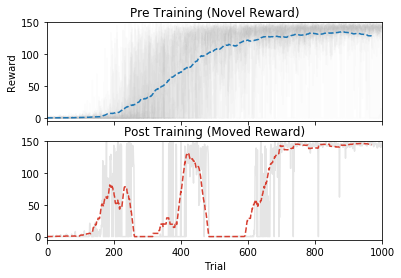

In [40]:
fig, ax = plt.subplots(2,1, sharex = True, sharey = True)
if pre_mf:
    for i in range(pre_train_mf.shape[0]):
        ax[0].plot(pre_train_mf[i], 'k', alpha = 0.01)
    ax[0].plot(pretrainmf_rm, "--", color=np.array([31,119,180])/255, label ='MF only')
    
    
if post_mf:
    for i in range(post_train_mf.shape[0]):
        ax[1].plot(post_train_mf[i], 'k', alpha = 0.1)
    ax[1].plot(posttrainmf_rm, "--",color=np.array([215,63,49])/255, label ='MF only')


ax[0].set_xlim((0,1000))

ax[0].set_ylim((-5,150))
ax[0].set_ylabel('Reward')
ax[1].set_xlabel('Trial')

ax[0].set_title('Pre Training (Novel Reward)')
ax[1].set_title('Post Training (Moved Reward)')
#fig.legend(bbox_to_anchor=(1,0.75))
plt.savefig('comparemf-ec.svg', format='svg')
plt.show()
plt.close()

NameError: name 'posttrainmf_max' is not defined

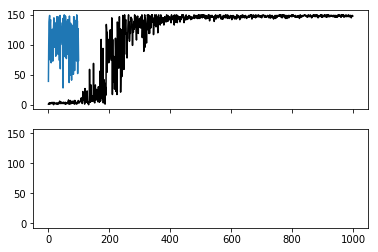

In [16]:
## MAx values
fig, ax = plt.subplots(2,1, sharex = True, sharey = True)
if pre_mf:
    ax[0].plot(pretrainmf_max, 'k', label ='MF only')
    
if pre_ec:
    ax[0].plot(pretrainec_max, color=np.array([31,119,180])/255, label ='MF + EC')
    
if post_mf:
    ax[1].plot(posttrainmf_max, 'k', label ='MF only')

if post_ec:
    ax[1].plot(posttrainec_max, color=np.array([215,63,49])/255, label ='MF + EC')


ax[0].set_xlim((0,100))
ax[0].set_ylim((-5,150))
ax[0].set_title('Pre Training (Novel Reward)')
ax[1].set_title('Post Training (Moved Reward)')
ax[0].legend(bbox_to_anchor=(1,0.75))
ax[1].legend(bbox_to_anchor=(1,0.75))
plt.show()
plt.close()

In [ ]:
## SEM
fig, ax = plt.subplots(2,1, sharex = True, sharey = True)
if pre_mf:
    ax[0].plot(pretrainmf_sem, 'k', label ='MF only')
    
if pre_ec:
    ax[0].plot(pretrainec_sem, color=np.array([31,119,180])/255, label ='MF + EC')
    
if post_mf:
    ax[1].plot(posttrainmf_sem, 'k', label ='MF only')

if post_ec:
    ax[1].plot(posttrainec_sem, color=np.array([215,63,49])/255, label ='MF + EC')


ax[0].set_xlim((0,100))
ax[0].set_ylim((-5,150))
ax[0].set_title('Pre Training (Novel Reward)')
ax[1].set_title('Post Training (Moved Reward)')
ax[0].legend(bbox_to_anchor=(1,0.75))
ax[1].legend(bbox_to_anchor=(1,0.75))
plt.suptitle('SEM Values')
plt.show()
plt.close()

In [ ]:
## Median Values
fig, ax = plt.subplots(2,1, sharex = True, sharey = True)
if pre_mf:
    ax[0].plot(pretrainmf_med, 'k', label ='MF only')
    
if pre_ec:
    ax[0].plot(pretrainec_med, color=np.array([31,119,180])/255, label ='MF + EC')
    
if post_mf:
    ax[1].plot(posttrainmf_med, 'k', label ='MF only')

if post_ec:
    ax[1].plot(posttrainec_med, color=np.array([215,63,49])/255, label ='MF + EC')


ax[0].set_xlim((0,100))
ax[0].set_ylim((-5,150))
ax[0].set_title('Pre Training (Novel Reward)')
ax[1].set_title('Post Training (Moved Reward)')
ax[0].legend(bbox_to_anchor=(1,0.75))
ax[1].legend(bbox_to_anchor=(1,0.75))
plt.suptitle('Median Values')

plt.show()
plt.close()